<a href="https://colab.research.google.com/github/pranavkantgaur/ML-course/blob/main/ml_lec_2_feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objectives:
•	Understanding Data Sets: Dimensionality, Dimensionality Reduction; Principal Component analysis(PCA), Linear Discriminant Analysis (LDA), t-Distributed Stochastic Neighbor Embedding (t-SNE).

## WHAT IS NON LINEAR DIM REDUCTION?

## PCA
* Concepts:
  * The main idea behind this technique is to reduce the dimensionality of data that is highly correlated by transforming the original set of vectors to a new set which is known as Principal component.
  * Transformations: https://miro.medium.com/max/1400/1*LwmAwpNTGQ_a7n--n3LQpA.jpeg
  * Linear dimesnionality reduction technique
  * Methods of computing PCA:
    * Data matrix->Covariance matrix->Eigendecomposition->Extract primary components
    * Data matrix->SVD->Extract primary components
* Examples:
  * No. of rooms, carpet area, proximity to park(unrelated variable), prox. to bus station, prox. to train station(dependant on bus stat.), prox. to market, flat-price

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd

In [ ]:
X =  pd.read_csv('/content/car_evaluation.csv')

In [ ]:
y_labels = X['decision'].unique()
y = X['decision']
#y = X['decision']
#y_unique_values = y.unique()
#print(X['decision'])

In [ ]:
print(y)

In [ ]:
#X.head()
X = X.drop('decision', axis = 1)
X.head()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
feature_list = X.columns
print(feature_list)
for feature in feature_list:
  feature_column = X[feature]
  le.fit(feature_column)
  print(le.classes_)
  X[feature] = le.transform(feature_column)

le.fit(y)
y = le.transform(y)

In [ ]:
le.fit(y)
y = le.transform(y)

In [ ]:
pca = PCA(n_components=3)

In [ ]:
pca.fit(X)
#PCA(n_components=2)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

In [ ]:
X = pca.transform(X)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
name_label = [(y, id) for id, y in enumerate(y)]
print(name_label)

In [ ]:
fig = plt.figure(1, figsize=(20, 15))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)

plt.cla()
name_label = [(y_label, id) for id, y_label in enumerate(y_labels)]
for name, label in name_label:
    #print(X[y == label, 0])
    #print(X[0, 0])
    ax.text3D(        
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
print(y)
s=[200,400,600,100]
y = np.choose(y, [1, 2, 0, 3]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k", s=200)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()




## t-distributed stochastic neighbor embedding(T-SNE)
* Data visualization using non-linear dimensionality reduction.
* Can create clusters for well-separated datasets
* While t-SNE plots often seem to display clusters, the visual clusters can be influenced strongly by the chosen parameterization and therefore a good understanding of the parameters for t-SNE is necessary. Such "clusters" can be shown to even appear in non-clustered data. https://stats.stackexchange.com/a/264647
* https://www.geeksforgeeks.org/difference-between-pca-vs-t-sne/

* Minimise relative rentropy(or KL divergence) by mapping n-D data to 2D/3D data representation.
* t-SNE creates a reduced feature space where similar samples are modeled by nearby points and dissimilar samples are modeled by distant points with high probability.
* KL divergence is the measure of similarity of one probobility distribution wrt. another.


### Important parameters for tSNE
* Reference: https://distill.pub/2016/misread-tsne/
* Parameters:
  * Number of points per cluster (defines input data)
  * Perplexity(**TODO**)
  * Ephsilon

In [ ]:
#import numpy as np
from sklearn.datasets import load_digits
#from scipy.spatial.distance import pdist
#from sklearn.manifold.t_sne import _joint_probabilities
#from scipy import linalg
#from sklearn.metrics import pairwise_distances
#from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 4)

In [ ]:
X =  pd.read_csv('/content/car_evaluation.csv')
X = X.drop('decision', axis = 1)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
feature_list = X.columns
print(feature_list)
for feature in feature_list:
  feature_column = X[feature]
  le.fit(feature_column)
  print(le.classes_)
  X[feature] = le.transform(feature_column)


In [ ]:
tsne = TSNE(n_components = 3)
X_embedded = tsne.fit_transform(X)

In [ ]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], X_embedded[:,2], hue=y, legend='full', palette=palette)

## Understanding difference between PCA and tSNE (TODO)
* https://colab.research.google.com/drive/1CRxJKLr2YvROXj2iGaEsK5EZeM_X3-J3?usp=sharing



## Perfomance of model depends on data quality


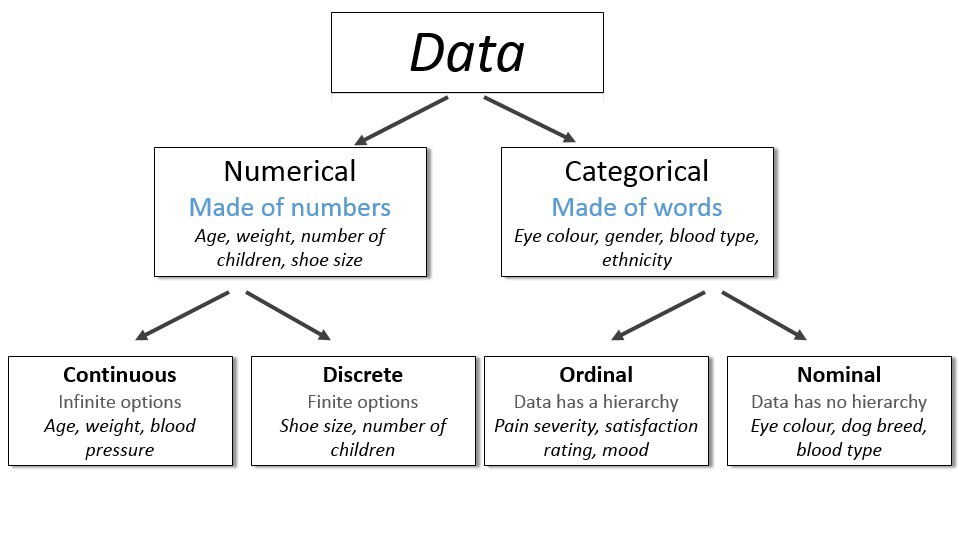

## Preparing the data
* Preprocessing:
  * For non-categorical/ordinal data:
    * Data standardization to avoid large variance across features
  * For categorical data: 
    * One-hot encoding
    * Label encoding
    * Ordinal encoding(**use this for encoding in car-eval dataset, TODO**)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
width = np.array([140, 150, 160, 190])
height = np.array([55, 60, 71, 99])

mean_width = width.mean()
std_width = width.std()

mean_height = height.mean()
std_height = height.std()

max_height = height.max()
min_height = height.min()

max_width = width.max()
min_width = width.min()



In [ ]:
max_min_norm_height = [(x-min_height)/(max_height-min_height) for x in height]
max_min_norm_width = [(x-min_width)/(max_width-min_width) for x in width]

std_norm_height = [(x-mean_height)/std_height for x in height]
std_norm_width = [(x-mean_width)/std_width for x in width]

In [ ]:
print(max_min_norm_height)
print(max_min_norm_width)


[0.0, 0.11363636363636363, 0.36363636363636365, 1.0]
[0.0, 0.2, 0.4, 1.0]


In [ ]:
print(std_norm_height)
print(std_norm_width)

[-0.9539245257678995, -0.6604092870700843, -0.014675761934890763, 1.6290095747728746]
[-1.0690449676496976, -0.5345224838248488, 0.0, 1.6035674514745462]


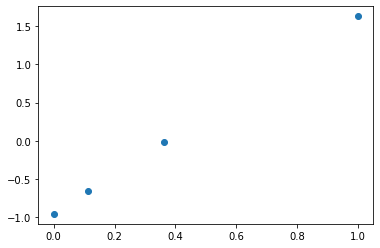

In [ ]:
plt.scatter(max_min_norm_height,std_norm_height)

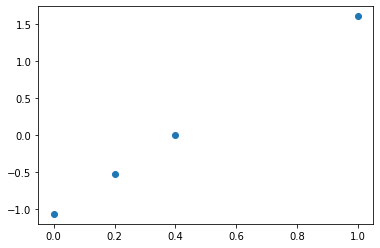

In [ ]:
plt.scatter(max_min_norm_width,std_norm_width)

(array([70., 70., 70., 70., 70., 70., 70., 70., 70., 70.]),
 array([-1.72957821, -1.38366257, -1.03774693, -0.69183129, -0.34591564,
         0.        ,  0.34591564,  0.69183129,  1.03774693,  1.38366257,
         1.72957821]),
 <a list of 10 Patch objects>)

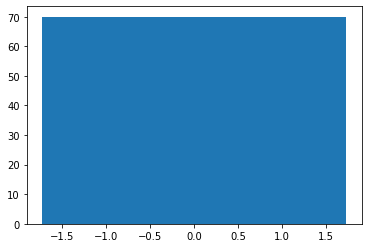

In [ ]:
random_data = np.linspace(1,1000,700)
std_norm_random_data = [(x-random_data.mean())/random_data.std() for x in random_data]
plt.hist(std_norm_random_data)

(array([  9.,  26.,  63.,  94., 166., 161., 104.,  54.,  19.,   4.]),
 array([-2.88433582, -2.29629817, -1.70826051, -1.12022285, -0.53218519,
         0.05585247,  0.64389013,  1.23192779,  1.81996544,  2.4080031 ,
         2.99604076]),
 <a list of 10 Patch objects>)

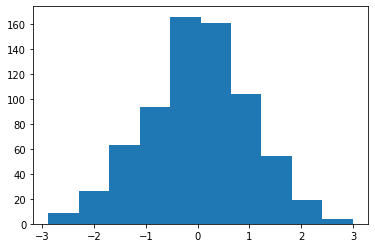

In [ ]:
random_data = np.random.normal(size = 700)
std_norm_random_data = [(x-random_data.mean())/random_data.std() for x in random_data]
plt.hist(std_norm_random_data)

In [ ]:
'''
After scaling > 1
1. Truncate to 0 - 1
2. Outlier for noisy data
3. Debug case: Model retraining?, analmoly?
'''

## Remove redundacy